# Airbnb House Analysis and Recommender Application

##### Jie Bao, Kuangyi Zhang, Lanny Xu
##### Dr. Bamshad Mobasher, Spring 2018

## PART 1   Feature Analysis and Item-based Recommender

### Import Library

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *
from sklearn import neighbors, tree, naive_bayes, cross_validation
from sklearn.cross_validation import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor, LogisticRegression
from sklearn.grid_search import GridSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn import cross_validation

import operator

Populating the interactive namespace from numpy and matplotlib


D:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\ProgramData\Anaconda2\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
D:\ProgramData\Anacon

### Read in data and preprocessing

#### Read in data

In [2]:
listings = pd.read_table("listings_edited.csv", index_col=0, header='infer', delimiter=",")
print listings.shape
listings.head(5)

(5207, 38)


,listing_url,name,summary,picture_url,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,state,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
13824783,https://www.airbnb.com/rooms/13824783,Full floor of a city cottage (up to 4 guests),This 3rd-floor garrett apartment (built-out at...,https://a0.muscache.com/im/pictures/510d45f8-e...,within an hour,100%,t,t,Lincoln Square,IL,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,moderate,2.57
16740225,https://www.airbnb.com/rooms/16740225,Guest Room of Two Bedroom Condo,Warm and secure room in a Two Bedroom Condo lo...,https://a0.muscache.com/im/pictures/697182d3-d...,within an hour,100%,f,t,Lincoln Square,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,strict,NaN
18125245,https://www.airbnb.com/rooms/18125245,"Cozy, spacious 2 flat in Lincoln Square!","This cute, spacious 2 flat in Lincoln Square i...",https://a0.muscache.com/im/pictures/bf761217-c...,within an hour,100%,f,t,Lincoln Square,IL,...,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,4.00
8362570,https://www.airbnb.com/rooms/8362570,Lincoln Square Ravenswood,"Lincoln square, Ravenswood and Andersonville g...",https://a0.muscache.com/im/pictures/224a38c0-a...,within a few hours,100%,t,t,Lincoln Square,IL,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,0.87
789867,https://www.airbnb.com/rooms/789867,Cozy Private Room in a Classic Chicago Appartm...,$40 OFF COUPON FOR ALL NEW AIRBNB GUESTS - VIS...,https://a0.muscache.com/im/pictures/72031963/0...,within an hour,100%,f,t,Lincoln Square,IL,...,94.0,9.0,9.0,10.0,10.0,10.0,9.0,t,strict,1.96


In [3]:
listings.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
listing_url,5207,5207,https://www.airbnb.com/rooms/6558625,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,5206,5169,Wells St Suites - Old Town 3 Bed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
summary,5125,4841,This property offers luxury in Chicago’s trend...,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picture_url,5207,5202,https://a0.muscache.com/im/pictures/70087089/b...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_time,4951,4,within an hour,3257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,4951,55,100%,3873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,5207,2,f,3840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,5207,2,t,4093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_cleansed,5207,72,West Town,729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,5207,3,IL,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
listings.dtypes

listing_url                     object
name                            object
summary                         object
picture_url                     object
host_response_time              object
host_response_rate              object
host_is_superhost               object
host_identity_verified          object
neighbourhood_cleansed          object
state                           object
city                            object
zipcode                         object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
price                           object
security_deposit                object
cleaning_fee                    object
guests_included                  int64
extra_people                    object
minimum_nights           

#### Drop unwanted attributes

In [5]:
# state, city, zipcode, drop neighbourhood_cleansed, reviews_per_month
listings_edit = listings.drop(['state', 'city', 'zipcode', 'neighbourhood_cleansed', 'reviews_per_month'], axis=1)

#### Handle missing values

Remove listing without review data

In [6]:
listings_edit = listings_edit.dropna(subset=['host_response_time','host_response_rate','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])

In [7]:
listings_edit.shape

(4273, 33)

Fill in missing values

In [8]:
# rooms
listings_edit = listings_edit.fillna({"bathrooms": "0", "bedrooms": "0", "beds": "0"})

In [9]:
# fee
listings_edit = listings_edit.fillna({"price": "$0", "security_deposit": "$0", "cleaning_fee": "$0", "extra_people": "$0"})

#### Transfer object to numeric values

In [10]:
# list all object columns
obj_listings_edit = listings_edit.select_dtypes(include=['object']).copy()
obj_listings_edit.head()

,listing_url,name,summary,picture_url,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,...,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,extra_people,instant_bookable,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,
13824783,https://www.airbnb.com/rooms/13824783,Full floor of a city cottage (up to 4 guests),This 3rd-floor garrett apartment (built-out at...,https://a0.muscache.com/im/pictures/510d45f8-e...,within an hour,100%,t,t,House,Private room,...,1,2,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",$56.00,$0,$30.00,$15.00,t,moderate
18125245,https://www.airbnb.com/rooms/18125245,"Cozy, spacious 2 flat in Lincoln Square!","This cute, spacious 2 flat in Lincoln Square i...",https://a0.muscache.com/im/pictures/bf761217-c...,within an hour,100%,f,t,Townhouse,Private room,...,2,3,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$80.00,$150.00,$65.00,$15.00,f,moderate
8362570,https://www.airbnb.com/rooms/8362570,Lincoln Square Ravenswood,"Lincoln square, Ravenswood and Andersonville g...",https://a0.muscache.com/im/pictures/224a38c0-a...,within a few hours,100%,t,t,Condominium,Private room,...,1,1,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$80.00,$0,$10.00,$10.00,f,flexible
789867,https://www.airbnb.com/rooms/789867,Cozy Private Room in a Classic Chicago Appartm...,$40 OFF COUPON FOR ALL NEW AIRBNB GUESTS - VIS...,https://a0.muscache.com/im/pictures/72031963/0...,within an hour,100%,f,t,Apartment,Private room,...,1,1,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$20.00,$0,$0,$10.00,t,strict
16701336,https://www.airbnb.com/rooms/16701336,Master Bedroom of Two Bedroom Condo,Warm and secure room in a Two Bedroom Condo lo...,https://a0.muscache.com/im/pictures/83ff781b-f...,within an hour,100%,f,t,Condominium,Private room,...,1,1,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",$28.00,$0,$35.00,$20.00,t,strict


Transfer categorical to numerical values using manually input

In [11]:
# host_response_time
# check counts for each type
listings_edit["host_response_time"].value_counts()

within an hour        2865
within a few hours     802
within a day           580
a few days or more      26
Name: host_response_time, dtype: int64

In [12]:
# replace the value manually
response_time_num = {"host_response_time": {"within an hour": 0, "within a few hours": 1, 
                                                "within a day": 2, "a few days or more": 3, "none": 4}}
listings_edit.replace(response_time_num, inplace=True)

In [13]:
listings_edit["host_response_time"].value_counts()

0    2865
1     802
2     580
3      26
Name: host_response_time, dtype: int64

In [14]:
# host_is_superhost
listings_edit["host_is_superhost"].value_counts()

f    2989
t    1284
Name: host_is_superhost, dtype: int64

In [15]:
superhost_num = {"host_is_superhost": {"t": 1, "f": 0}}
listings_edit.replace(superhost_num, inplace=True)

In [16]:
print listings_edit["host_is_superhost"].value_counts()

0    2989
1    1284
Name: host_is_superhost, dtype: int64


Transfer categorical to numerical values using sklearn.LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder  

In [18]:
# host_id_verified
le = LabelEncoder()
print listings_edit["host_identity_verified"].value_counts()
listings_edit["host_identity_verified"] = le.fit_transform(listings_edit["host_identity_verified"])
print listings_edit["host_identity_verified"].value_counts()

t    3488
f     785
Name: host_identity_verified, dtype: int64
1    3488
0     785
Name: host_identity_verified, dtype: int64


In [19]:
# property_type_code
print listings_edit["property_type"].value_counts()
listings_edit["property_type"] = le.fit_transform(listings_edit["property_type"])
print listings_edit["property_type"].value_counts()

Apartment             2911
House                  639
Condominium            466
Loft                    88
Townhouse               72
Other                   26
Guesthouse              13
Bed & Breakfast         12
Dorm                    12
Boat                     8
Guest suite              5
Bungalow                 5
Hostel                   4
Boutique hotel           4
Villa                    3
In-law                   2
Timeshare                1
Vacation home            1
Serviced apartment       1
Name: property_type, dtype: int64
0     2911
10     639
5      466
12      88
16      72
13      26
8       13
6       12
1       12
2        8
7        5
4        5
3        4
9        4
18       3
11       2
15       1
14       1
17       1
Name: property_type, dtype: int64


In [20]:
# room_type_code
print listings_edit["room_type"].value_counts()
listings_edit["room_type"] = le.fit_transform(listings_edit["room_type"])
print listings_edit["room_type"].value_counts()

Entire home/apt    2544
Private room       1602
Shared room         127
Name: room_type, dtype: int64
0    2544
1    1602
2     127
Name: room_type, dtype: int64


In [21]:
# bed_type_code
print listings_edit["bed_type"].value_counts()
listings_edit["bed_type"] = le.fit_transform(listings_edit["bed_type"])
print listings_edit["bed_type"].value_counts()

Real Bed         4126
Airbed             56
Futon              48
Pull-out Sofa      27
Couch              16
Name: bed_type, dtype: int64
4    4126
0      56
2      48
3      27
1      16
Name: bed_type, dtype: int64


Transfer categorical to numerical values using pandas LabelEncoding

In [22]:
# instant_bookable
print listings_edit["instant_bookable"].value_counts()
listings_edit["instant_bookable"] = listings_edit["instant_bookable"].astype('category')
listings_edit["instant_bookable"] = listings_edit["instant_bookable"].cat.codes
print listings_edit["instant_bookable"].value_counts()

f    3035
t    1238
Name: instant_bookable, dtype: int64
0    3035
1    1238
Name: instant_bookable, dtype: int64


In [23]:
# cancellation_policy
print listings_edit["cancellation_policy"].value_counts()

listings_edit["cancellation_policy"] = listings_edit["cancellation_policy"].astype('category')
listings_edit["cancellation_policy"] = listings_edit["cancellation_policy"].cat.codes

print listings_edit["cancellation_policy"].value_counts()

strict             1946
moderate           1372
flexible            949
super_strict_30       5
super_strict_60       1
Name: cancellation_policy, dtype: int64
2    1946
1    1372
0     949
3       5
4       1
Name: cancellation_policy, dtype: int64


Transfer strings to integers

In [24]:
listings_edit['bathrooms'] = listings_edit['bathrooms'].astype('int')
listings_edit['bedrooms'] = listings_edit['bedrooms'].astype('int')
listings_edit[ 'beds'] = listings_edit[ 'beds'].astype('int')

Transfer percentages to integers

In [25]:
listings_edit['host_response_rate'] = listings_edit['host_response_rate'].str[:-1].astype('int')

In [26]:
listings_edit['host_response_rate'].head()

id
13824783    100
18125245    100
8362570     100
789867      100
16701336    100
Name: host_response_rate, dtype: int32

Transfer dollar prices to floats

In [27]:
listings_edit[['price']] = (listings_edit['price'].replace( '[\$,)]','', regex=True ).astype(float))
listings_edit[['security_deposit']] = (listings_edit['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float))
listings_edit[['cleaning_fee']] = (listings_edit['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float))
listings_edit[['extra_people']] = (listings_edit['extra_people'].replace( '[\$,)]','', regex=True ).astype(float))

#### Extract amenities values and add new columns

In [28]:
# TV, wireless internet, air condition, heating, pets, washer, dryer
attrs = ['TV', 'Internet', 'Air conditioning', 'Kitchen' , 'Heating', 'Washer', 'Dryer']
rows = listings_edit.shape[0]
for attr in attrs:
    listings_edit[attr] = pd.Series(np.zeros(rows), index=listings_edit.index).astype(integer)
print listings_edit.amenities[13824783]
print listings_edit.TV[13824783]
print listings_edit.Kitchen[13824783]

{TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,"Free parking on premises",Breakfast,"Pets live on this property",Dog(s),Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Room-darkening shades"}
0
0


In [29]:
for index, row in listings_edit.iterrows():
    for attr in attrs:
        if (row['amenities'].find(attr)>=0):
            listings_edit.set_value(index, attr, 1)
print listings_edit.amenities[13824783]
print listings_edit.TV[13824783]
print listings_edit.Kitchen[13824783]

{TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,"Free parking on premises",Breakfast,"Pets live on this property",Dog(s),Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Room-darkening shades"}
1
1


In [30]:
#check with the objects now
obj_listings_edit = listings_edit.select_dtypes(include=['object']).copy()
obj_listings_edit.head()

,listing_url,name,summary,picture_url,amenities
id,,,,,
13824783,https://www.airbnb.com/rooms/13824783,Full floor of a city cottage (up to 4 guests),This 3rd-floor garrett apartment (built-out at...,https://a0.muscache.com/im/pictures/510d45f8-e...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit..."
18125245,https://www.airbnb.com/rooms/18125245,"Cozy, spacious 2 flat in Lincoln Square!","This cute, spacious 2 flat in Lincoln Square i...",https://a0.muscache.com/im/pictures/bf761217-c...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
8362570,https://www.airbnb.com/rooms/8362570,Lincoln Square Ravenswood,"Lincoln square, Ravenswood and Andersonville g...",https://a0.muscache.com/im/pictures/224a38c0-a...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
789867,https://www.airbnb.com/rooms/789867,Cozy Private Room in a Classic Chicago Appartm...,$40 OFF COUPON FOR ALL NEW AIRBNB GUESTS - VIS...,https://a0.muscache.com/im/pictures/72031963/0...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
16701336,https://www.airbnb.com/rooms/16701336,Master Bedroom of Two Bedroom Condo,Warm and secure room in a Two Bedroom Condo lo...,https://a0.muscache.com/im/pictures/83ff781b-f...,"{TV,""Wireless Internet"",""Air conditioning"",Kit..."


#### Extract attributes for feature analysis

In [31]:
listings_eval = listings_edit.drop(['listing_url','name','summary','picture_url','amenities', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)

In [32]:
listings_eval.head()

,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_rating,instant_bookable,cancellation_policy,TV,Internet,Air conditioning,Kitchen,Heating,Washer,Dryer
id,,,,,,,,,,,,,,,,,,,,,
13824783,0,100,1,1,10,1,4,1,1,2,...,99.0,1,1,1,1,1,1,1,1,1
18125245,0,100,0,1,16,1,6,1,2,3,...,95.0,0,1,1,1,1,1,1,1,1
8362570,1,100,1,1,5,1,2,1,1,1,...,98.0,0,0,1,1,1,1,1,1,1
789867,0,100,0,1,0,1,3,1,1,1,...,94.0,1,2,1,1,1,1,1,1,1
16701336,0,100,0,1,5,1,2,1,1,1,...,100.0,1,2,1,1,1,1,1,1,1


## Feature Selection

#### Split data and target attributes

In [33]:
# Feature analysis
target = np.array(listings_eval['review_scores_rating'])
data = listings_eval.drop(['review_scores_rating'], axis=1)
print data.T.shape

(28, 4273)


In [34]:
from sklearn.cross_validation import train_test_split
fa_train, fa_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=33)

#### Define a function to compute the optimal percentile for FS

In [35]:
# Take as input the training data, target variable, the model and any other parameters
# return the optimal percentage of the most informative features to use
def calc_percent(train, target, model, interval, K):
    percentiles = range(1, 100, interval)
    results = []
    minScore = 100
    #print "Percentile\tMAE"
    indices = range(1, 100, interval)
    for i in indices:
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        train_fs = fs.fit_transform(train, target)
        scores = abs(cross_validation.cross_val_score(model, train_fs, target, cv=K, scoring='neg_mean_absolute_error'))
        # cross validation, return score array for each croos-validation
        # neg_mean_absolute_error returns negative MAE
        if (scores.mean() < minScore):
            minScore = scores.mean()
            optimal_percentile = i
        results = np.append(results, scores.mean())
        #print "%d\t\t%.4f" %(i,scores.mean())
        
    plt.plot(indices, results, alpha=0.7, lw=2, c='r')  
    plt.legend(loc=8)
    plt.xlabel('Percentile')
    plt.ylabel("Mean Absolute Error")
    
    print model
    print "Minimum MAE on training: %.4f" %minScore
    print "Optimal percentile of features: {0}".format(optimal_percentile)
    optimal_num_features = int(optimal_percentile*len(train.T)/100)
    print "Optimal number of features: {0}".format(optimal_num_features)
    
    return optimal_percentile

#### Try Linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Minimum MAE on training: 3.7655
Optimal percentile of features: 76
Optimal number of features: 21


D:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


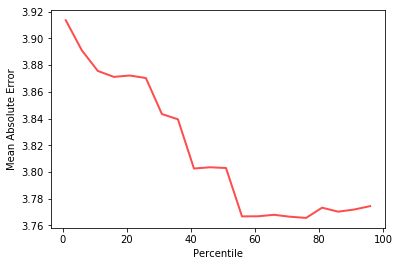

In [36]:
linreg = LinearRegression()
linreg.fit(fa_train, target_train)

lr_opPer = calc_percent(fa_train, target_train, linreg, 5, 5)

In [37]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=lr_opPer)
train_lr_fs = fs.fit_transform(fa_train, target_train)
print "Selcted features:"
print data.columns[fs.get_support()].values

linreg_fs = LinearRegression()
linreg_fs.fit(train_lr_fs, target_train)
test_lr_fs = fs.transform(fa_test)

scores = abs(cross_validation.cross_val_score(linreg_fs, test_lr_fs, target_test, cv=5, scoring='neg_mean_absolute_error'))
print "\nMAE on testing: %.4f" %scores.mean()

Selcted features:
['host_response_rate' 'host_is_superhost' 'host_identity_verified'
 'property_type' 'accommodates' 'bathrooms' 'beds' 'bed_type' 'price'
 'guests_included' 'minimum_nights' 'number_of_reviews' 'instant_bookable'
 'cancellation_policy' 'TV' 'Internet' 'Air conditioning' 'Kitchen'
 'Heating' 'Washer' 'Dryer']

MAE on testing: 3.8845


#### Try Ridge regression

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Minimum MAE on training: 3.7654
Optimal percentile of features: 76
Optimal number of features: 21


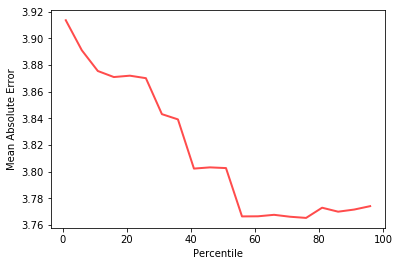

In [38]:
rireg = Ridge(fit_intercept=True, alpha = 0.3)
rireg.fit(fa_train, target_train)

rr_opPer= calc_percent(fa_train, target_train, rireg, 5, 5)

In [39]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=rr_opPer)
train_rr_fs = fs.fit_transform(fa_train, target_train)
print "Selcted features:"
print data.columns[fs.get_support()].values

rireg_fs = Ridge(fit_intercept=True, alpha = 0.3)
rireg_fs.fit(train_rr_fs, target_train)
test_rr_fs = fs.transform(fa_test)

scores = abs(cross_validation.cross_val_score(rireg_fs, test_rr_fs, target_test, cv=5, scoring='neg_mean_absolute_error'))
print "\nMAE on testing: %.4f" %scores.mean()

Selcted features:
['host_response_rate' 'host_is_superhost' 'host_identity_verified'
 'property_type' 'accommodates' 'bathrooms' 'beds' 'bed_type' 'price'
 'guests_included' 'minimum_nights' 'number_of_reviews' 'instant_bookable'
 'cancellation_policy' 'TV' 'Internet' 'Air conditioning' 'Kitchen'
 'Heating' 'Washer' 'Dryer']

MAE on testing: 3.8822


#### Try Lasso regression

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Minimum MAE on training: 3.8952
Optimal percentile of features: 71
Optimal number of features: 19


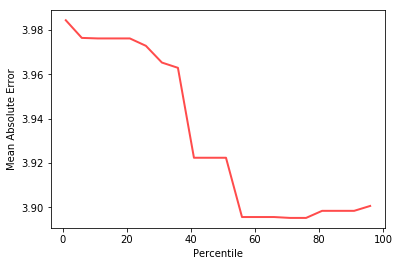

In [40]:
lareg = Lasso(fit_intercept=True, alpha = 0.3)
lareg.fit(fa_train, target_train)

la_opPer= calc_percent(fa_train, target_train, lareg, 5, 5)

In [41]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=la_opPer)
train_la_fs = fs.fit_transform(fa_train, target_train)
print "Selcted features:"
print data.columns[fs.get_support()].values

lareg_fs = Lasso(fit_intercept=True, alpha = 0.3)
lareg_fs.fit(train_la_fs, target_train)
test_la_fs = fs.transform(fa_test)

scores = abs(cross_validation.cross_val_score(lareg_fs, test_la_fs, target_test, cv=5, scoring='neg_mean_absolute_error'))
print "\nMAE on testing: %.4f" %scores.mean()

Selcted features:
['host_response_rate' 'host_is_superhost' 'host_identity_verified'
 'property_type' 'accommodates' 'bathrooms' 'beds' 'price'
 'guests_included' 'minimum_nights' 'number_of_reviews' 'instant_bookable'
 'cancellation_policy' 'TV' 'Internet' 'Air conditioning' 'Kitchen'
 'Heating' 'Washer' 'Dryer']

MAE on testing: 3.8725


#### Try LogisticRegression with different parameters using GridSearch

In [42]:
parameters_LogisticRegression = {
    'penalty': ['l1','l2'],
    'C': [1e-5, 1, 1e5]
}
logreg = linear_model.LogisticRegression(random_state=32)
gs_logreg = GridSearchCV(logreg, parameters_LogisticRegression, verbose=1, cv=5, scoring='accuracy')

%time _ = gs_logreg.fit(fa_train, target_train)
print "The best parameters: %s" %gs_logreg.best_params_
print "The best accuracy result: %s" %abs(gs_logreg.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


D:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.4min finished


Wall time: 2min 28s
The best parameters: {'penalty': 'l1', 'C': 1}
The best accuracy result: 0.307782328847


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Minimum MAE on training: 3.9489
Optimal percentile of features: 76
Optimal number of features: 21


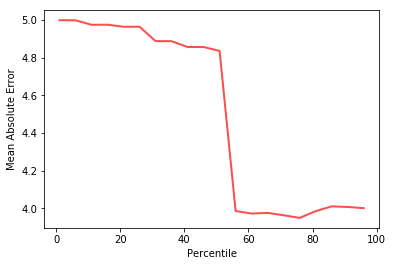

In [43]:
logreg = LogisticRegression(penalty='l1', C=1)
logreg.fit(fa_train, target_train)
log_opPer= calc_percent(fa_train, target_train, logreg, 5, 5)

In [44]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=log_opPer)
train_log_fs = fs.fit_transform(fa_train, target_train)
print "Selcted features:"
print data.columns[fs.get_support()].values

logreg_fs = LogisticRegression(penalty='l1', C=1)
logreg_fs.fit(train_log_fs, target_train)
test_log_fs = fs.transform(fa_test)

scores = abs(cross_validation.cross_val_score(logreg_fs, test_log_fs, target_test, cv=5, scoring='neg_mean_absolute_error'))
print "\nMAE on testing: %.4f" %scores.mean()

Selcted features:
['host_response_rate' 'host_is_superhost' 'host_identity_verified'
 'property_type' 'accommodates' 'bathrooms' 'beds' 'bed_type' 'price'
 'guests_included' 'minimum_nights' 'number_of_reviews' 'instant_bookable'
 'cancellation_policy' 'TV' 'Internet' 'Air conditioning' 'Kitchen'
 'Heating' 'Washer' 'Dryer']

MAE on testing: 4.1305


#### Try SGD with different parameters using GridSearch

In [45]:
# Standard Normalization
scaler = StandardScaler()
scaler.fit(data)
data_std = scaler.transform(data)
fa_train, fa_test, target_train, target_test = train_test_split(data_std, target, test_size=0.2, random_state=33)

In [46]:
parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(0.0001, 200, 400),
}
sgd = SGDRegressor()
gs = GridSearchCV(sgd, parameters, verbose=1, cv=5)

%time _ = gs.fit(fa_train, target_train)
print "The best parameters: %s" %gs.best_params_
print "The best accuracy result: %s" %abs(gs.best_score_)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
Wall time: 41.1 s
The best parameters: {'penalty': 'l2', 'alpha': 0.50135288220551377}
The best accuracy result: 0.0928479591735


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   41.0s finished


In [47]:
for (i, j) in gs.best_params_.items():
    sgd.set_params(**{i:j})
    print "The optimum value of", i, "is estimated as", j
print "The best accuracy result: %s" %abs(gs.best_score_)

The optimum value of penalty is estimated as l2
The optimum value of alpha is estimated as 0.501352882206
The best accuracy result: 0.0928479591735


SGDRegressor(alpha=0.501353, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
Minimum MAE on training: 3.8271
Optimal percentile of features: 56
Optimal number of features: 15


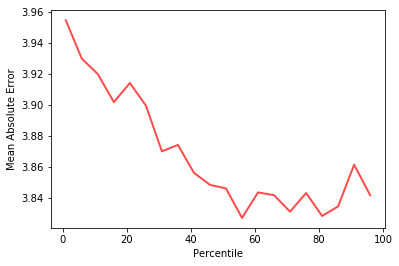

In [56]:
sgd = SGDRegressor(penalty='l2', alpha=0.501353)
sgd.fit(fa_train, target_train)
sgd_opPer= calc_percent(fa_train, target_train, sgd, 5, 5)

In [57]:
#Using the best parameters, apply the model to the set-aside test data
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=log_opPer)
train_sgd_fs = fs.fit_transform(fa_train, target_train)
print "Selcted features:"
print data.columns[fs.get_support()].values

sgd_fs = SGDRegressor(penalty='l2', alpha=0.501353)
sgd_fs.fit(train_sgd_fs, target_train)
test_sgd_fs = fs.transform(fa_test)

scores = abs(cross_validation.cross_val_score(sgd_fs, test_sgd_fs, target_test, cv=5, scoring='neg_mean_absolute_error'))
print "\nMAE on testing: %.4f" %scores.mean()

Selcted features:
['host_response_rate' 'host_is_superhost' 'host_identity_verified'
 'property_type' 'accommodates' 'bathrooms' 'beds' 'bed_type' 'price'
 'guests_included' 'minimum_nights' 'number_of_reviews' 'instant_bookable'
 'cancellation_policy' 'TV' 'Internet' 'Air conditioning' 'Kitchen'
 'Heating' 'Washer' 'Dryer']

MAE on testing: 3.8781


####  Discussion

Linear Regression: Optimal number of features: 21, MAE on training: 3.7655, MAE on testing: 3.8845

Ridge regression: Optimal number of features: 21, MAE on training: 3.7654, MAE on testing: 3.8822

Lasso regression: Optimal number of features: 19, MAE on training: 3.8952, MAE on testing: 3.8725

LogisticRegression: Optimal number of features: 21, MAE on training: 3.9489, MAE on testing: 4.1305

SGD: Optimal number of features: 15, MAE on training: 3.8271, MAE on testing: 3.8781

It can be seen that selecting 15 features using SGD regression, the MAE for training and testing data are both relatively small. Meanwhile, Percentile-MAE figures of different regresson analysis shows that MAE decreases to a small value after the Percentile increases to more than 56% (correseponding to 15 features). So we use 15 features out of 26 to do the similar items recommender. 

## Item-Based Recommender

In [36]:
listings_eval_update = listings_eval[['host_response_rate', 'host_is_superhost', 'host_identity_verified',
 'property_type', 'accommodates', 'bathrooms', 'beds', 'bed_type', 'price',
 'guests_included', 'minimum_nights', 'number_of_reviews', 'instant_bookable',
 'cancellation_policy', 'TV', 'Internet', 'Air conditioning', 'Kitchen',
 'Heating', 'Washer', 'Dryer']]

#### Using Cosine similarity measure

In [39]:
cos_knn = NearestNeighbors(metric = 'cosine', algorithm ='brute')
cos_knn.fit(listings_eval_update)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [40]:
# select first house for illustration
query_index = 1

In [41]:
distances, indices = cos_knn.kneighbors(listings_eval_update.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
for i in range(0, len(distances.flatten())):
    if i == 0:
        print "Recommendation for {0}: \n".format(listings_eval_update.index[query_index])
    else:
        print "{0}: {1}, with distance of {2}:".format(i, listings_eval_update.index[indices.flatten()[i]], distances.flatten()[i])

Recommendation for 18125245: 

1: 5749161, with distance of 0.00148514742898:
2: 13941593, with distance of 0.0016785639175:
3: 16087050, with distance of 0.0016947706069:
4: 16517575, with distance of 0.00186082124575:
5: 1027463, with distance of 0.0019135471623:


#### Using Pearson Correlation similarity measure

In [42]:
cor_knn = NearestNeighbors(metric = 'correlation', algorithm ='brute')
cor_knn.fit(listings_eval_update)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='correlation',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [43]:
distances, indices = cor_knn.kneighbors(listings_eval_update.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
for i in range(0, len(distances.flatten())):
    if i == 0:
        print "Recommendation for {0}: \n".format(listings_eval_update.index[query_index])
    else:
        print "{0}: {1}, with distance of {2}:".format(i, listings_eval_update.index[indices.flatten()[i]], distances.flatten()[i])

Recommendation for 18125245: 

1: 5749161, with distance of 0.0013017019353:
2: 16087050, with distance of 0.0017029572386:
3: 17593021, with distance of 0.0017809141608:
4: 13941593, with distance of 0.00180276471005:
5: 14077991, with distance of 0.00186618717721:


#### Using Eucldean similarity measure

In [44]:
euc_knn = NearestNeighbors(metric = 'euclidean', algorithm ='brute')
euc_knn.fit(listings_eval_update)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [45]:
distances, indices = euc_knn.kneighbors(listings_eval_update.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
for i in range(0, len(distances.flatten())):
    if i == 0:
        print "Recommendation for {0}: \n".format(listings_eval_update.index[query_index])
    else:
        print "{0}: {1}, with distance of {2}:".format(i, listings_eval_update.index[indices.flatten()[i]], distances.flatten()[i])

Recommendation for 18125245: 

1: 5749161, with distance of 7.07106781187:
2: 16087050, with distance of 7.54983443527:
3: 13941593, with distance of 8.12403840464:
4: 14077991, with distance of 8.12403840464:
5: 14231792, with distance of 8.54400374532:


#### Parameter analysis to find out the distance measurement with the least MAE

In [38]:
from numpy import *
from numpy import linalg as la
import numpy as np

# three distance meansurement
def ecludSim(inA,inB):
    return 1.0 / (1.0 +np.linalg.norm(inA - inB))
def pearsSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]
def cosSim(vecA,vecB):#only take array!!
    vecA_norm=np.linalg.norm(vecA) 
    vecB_norm=np.linalg.norm(vecB)
    sims=np.dot(vecA,vecB)/(vecA_norm*vecB_norm)
    return sims 

In [39]:
# two ways to compute column-based similarity matrix
def standEst(dataMat,simMeas, K=4):
    n = shape(dataMat)[1]
    similarities = np.zeros((n,n))
    if n>1:
        for i in range(n):
            similarities[i,i] = 1
            for j in range(i+1, n):
                overLap = nonzero(logical_and(dataMat[:,i]>0, \
                                      dataMat[:,j]>0))[0]
                if len(overLap) == 0: similarities[i,j] = 0
                else: similarities[i,j] = simMeas(dataMat[overLap,i], \
                                   dataMat[overLap,j])
                similarities[j,i] = similarities[i,j]
    return similarities

def svdEst(dataMat,simMeas, K=4):
    n = shape(dataMat)[1]
    similarities = np.ones((n,n))
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    SigK = mat(eye(K)*Sigma[:K]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:K] * SigK.I  #create transformed items
    if n>1:
        for i in range(n):
            for j in range(i+1, n):
                similarities[i,j] = simMeas(xformedItems[i,:].T,\
                             xformedItems[j,:].T)
                similarities[j,i] = similarities[i,j]
    return similarities   
    
# item-based collabrative filtering
def estRating(dataMat, simMtr, user, item):
    n = shape(simMtr)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMtr[item, j]
        if similarity>=0: 
            simTotal += similarity
            ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [40]:
# This function performs evaluatoin on a single user based on the test_ratio
# For example, with test_ratio = 0.2, a randomly selected 20 percent of rated 
# items by the user are withheld and the rest are used to estimate the withheld ratings
def cross_validate_user(dataMat, user, test_ratio, simMtr):
    
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])#non-zero rating 
    
    test_size = int(test_ratio * len(rated_items_by_user))
    np.random.seed(seed=20)
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)#Add indices for each test item
    withheld_items = rated_items_by_user[test_indices]#Items used for test
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)
    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estRating(dataMat, simMtr, user, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])
        #print error_u
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [41]:
# Iterate over all users and for each perform evaluation by calling
# the above cross_validate_user function on each user.  Return ratio of total error 
# across all test cases to the total number of test cases, for all users

def test(dataMat, test_ratio, estMethod, simMeas):    
    simMtr = estMethod(dataMat,simMeas)
    
    total_error = 0
    total_count = 0
    c=0
    for i in range(dataMat.shape[0]):
        error_u, count_u = cross_validate_user(dataMat, i, test_ratio, simMtr)
        total_error += error_u
        total_count += count_u
    MAE = total_error/total_count
    print 'Mean Absoloute Error for ',estMethod,' : ', MAE
    return MAE

In [42]:
listings_eval_update_np = np.array(listings_eval_update)
listings_eval_update_np

array([[ 100.,    1.,    1., ...,    1.,    1.,    1.],
       [ 100.,    0.,    1., ...,    1.,    1.,    1.],
       [ 100.,    1.,    1., ...,    1.,    1.,    1.],
       ..., 
       [ 100.,    1.,    1., ...,    1.,    1.,    1.],
       [ 100.,    0.,    0., ...,    1.,    1.,    1.],
       [ 100.,    0.,    1., ...,    1.,    1.,    1.]])

In [44]:
print "Using Eucldean similarity measure:"
mae1 = test(listings_eval_update_np, 0.2,standEst,ecludSim)

print "\nUsing Cosine similarity measure:"
mae2 = test(listings_eval_update_np, 0.2,standEst,cosSim)

print "\nUsing Pearson Correlation similarity measure:"
mae3 = test(listings_eval_update_np, 0.2,standEst,pearsSim)

Using Eucldean similarity measure:
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  4.21403375603

Using Cosine similarity measure:
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  16.4065734884

Using Pearson Correlation similarity measure:
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  18.4670751213


In [45]:
# Compare different similarity measure
def compare_sims(data):
    x=[]
    score1 =[]
    score2 =[]
    score3 =[]
    for i in range(5,50,5):
        crosssize = i *0.01
        score1.append(test(data,crosssize,standEst,ecludSim))
        score2.append(test(data,crosssize,standEst,cosSim))
        score3.append(test(data,crosssize,standEst,pearsSim))
        x.append(crosssize)
    plt.plot(x, score1, label='Euclidean',alpha=0.7, lw=2, c='r')  
    plt.plot(x, score2, label='Cosine',alpha=0.7, lw=2, c='b')
    plt.plot(x, score3, label='pearsSim',alpha=0.7, lw=2, c='g')
    plt.legend(loc=8)
    plt.xlabel('Test Ratio')
    plt.ylabel("Mean Absolute Error")

Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  4.04987637881
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  8.72890836213
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  23.9364622425
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  1.32363232304
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  13.3175474095
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  23.8958345738
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  1.22733475886
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  14.8568298224
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  16.1251316442
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  4.21403375603
Mean Absoloute Error for  <function standEst at 0x000000000C887898>  :  16.4065734884
Mean Absoloute Error for  <function standEst at 0x0000

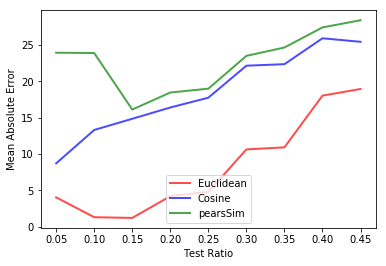

In [46]:
compare_sims(listings_eval_update_np)

#### Choose Euclidean similarity measure, use a random id to illustrate results

In [115]:
query_index = np.random.choice(listings_eval_update.shape[0])
distances, indices = euc_knn.kneighbors(listings_eval_update.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [116]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print "Recommendation for {0}: \n".format(listings_eval_update.index[query_index])
    else:
        print "{0}: {1}, with distance of: {2}".format(i, listings_eval_update.index[indices.flatten()[i]], distances.flatten()[i])

Recommendation for 7869969: 

1: 2934604, with distance of: 5.56776436283
2: 4173269, with distance of: 6.16441400297
3: 5210927, with distance of: 10.8166538264
4: 1854000, with distance of: 11.3578166916
5: 872247, with distance of: 11.5325625947
